# Estimation

Often times, we can assume we have data that follows a random variable that normally distributed, or distributed according to some other distribution that has parameters. If we do make this assumption though, then how do we find out the value of these parameters?

We saw that the normal distribution has parameters $\mu$ (mean) and $\sigma$ (standard deviation). If we have data that we think came from a normal distribution, but we don't know exactly what kind of normal distribution, then $\mu$ and $\sigma$ are unknown and for all intents and purposes they are random variables with their own PDFs. In this section we will cover how to find the PDFs of these parameters.

Finding these PDFs is very useful! Say we have a bunch of cat heart weight measurements. We think they come from a normal distribution, but we want to know what the mean and standard deviation of that normal distribution is. There won't be an oracle that will tell us exactly, so the next best thing is to find the PDF of these random variables. If we have the PDF of $\mu$ for example, we can find out things like what the most likely value of $\mu$ is, how certain we are that $\mu$ is close to that value, and probabilitiy that $\mu$ is greater than 10 grams. 

#### Bayes Rule

<font color='red'>Bayes rule</font> is a formula that helps us find the PDF of random variables in terms of the PDF of other random variables. Bayes rule is often used in the estimation of parameters. If we're interested in finding the distribution of $\mu$ given the data we saw, then Bayes rule states:

$$p(\,\mu\,|\,\mathrm{Data})=\frac{p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)}{p(\mathrm{Data})} \propto p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)$$

This formula is of course the same for any parameter not just $\mu$. $p(\,\mathrm{Data}\,|\,\mu)$ is called a likelihood and $p(\mu)$ is called a prior. We will discuss what these mean.

#### Likelihoods

A <font color='red'>likelihood</font> is a formula that tells us how likely a certain parameter value is for a certain set of data. Recall that the PDF of a normal distribution in terms of $\mu$ and $\sigma$ is

$$p(\,x\,|\,\mu, \sigma)= \frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{exp}\left\{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right\}$$

Say we have a single cat heart measurement that is 10.2 grams, we assume it's from a normal distribution, and an oracle tells us the variance, $\sigma$ is 2. Then for this data the likelihood of $\mu$ is

$$p(\,\mathrm{Data}\,|\,\mu) = p(10.2\,|\,\mu,\,2) = \frac{1}{\sqrt{8\pi}}\mathrm{exp}\left\{-\frac{1}{2}\left(\frac{10.2-\mu}{2}\right)^2 \right\}$$

We can visually see that the most "likely" value of $\mu$ is 10.2, this is because the likelihood is at a maximum when $\mu=10.2$. In other words, the value of $\mu$ that explains how we got that one data point the best is 10.2, the value of our single measurement.

Now we say we have a second independent measurement of 10.4. The likelihood of $\mu$ for these two points is simply the product of their PDFs. That is

$$p(\,\mathrm{Data}\,|\,\mu)=p(10.2,\,10.4\,|\,\mu,\,2)=\frac{1}{\sqrt{8\pi}}\mathrm{exp}\left\{-\frac{1}{2}\left(\frac{10.2-\mu}{2}\right)^2 \right\} \cdot \frac{1}{\sqrt{8\pi}}\mathrm{exp}\left\{-\frac{1}{2}\left(\frac{10.4-\mu}{2}\right)^2 \right\}$$

If we did some simplification of the above expression we would see the likely value of $\mu$ is 10.3 i.e. that average of our two measurements 10.2 and 10.4. Intuitively this makes sense. The value of $\mu$ that best explains the two data points we saw is the average of the two points. In general if we have $N$ points instead of two and we label each measurement $x_i$ then our likelihood is

$$p(\,\mathrm{Data}\,|\,\mu)= \prod_{i=1}^N\frac{1}{\sqrt{8\pi}}\mathrm{exp}\left\{-\frac{1}{2}\left(\frac{x_i-\mu}{2}\right)^2 \right\}$$

Thus no matter how many measurements or realizations of a random variable we have we could find the likelihood of $\mu$. We are one step closer to using Bayes rule for finding $p(\, \mu\, |\,\mathrm{Data})$

#### Priors

The other component from our Bayes rule equation that is important is the prior. The <font color='red'>prior</font> of a parameter (such as $\mu$) is a PDF that we choose to express our prior beliefs about that parameter. Thus a prior can be anything we want! 

For out cat heart example, suppose we guess the average cat heart to be 15 grams. This is just a wild guess that we're not that confident about so we will chose a very large standard deviation, to reflect that other possibilities also have a high chance of being the average weight of a cat heart. Below we show how to plot the PDF of two different normal distributions. The figure illustrates how using a normal distribution with a high standard deviation describes a more agnostic belief by giving more equal probability to more values.

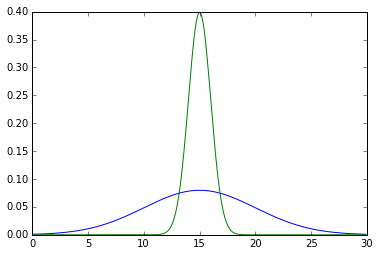

In [21]:
%matplotlib inline
from scipy.stats import norm
from matplotlib import pyplot as plt

x = np.arange(0, 30, step=0.1)
p_sigma5 = norm.pdf(x, loc=15, scale=5)
p_sigma1 = norm.pdf(x, loc=15, scale=1)
plt.plot(x, p_sigma5)
plt.plot(x, p_sigma1)

#### Putting Together Priors and Likelihoods

We have from Bayes rule that

$$p(\,\mu\,|\,\mathrm{Data})=\frac{p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)}{p(\mathrm{Data})} \propto p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)$$

We now can come up with both $p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)$. Notice that $p(\mathrm{Data})$ is the probability of your data. Since your data is already there and not changing at the time you're ready to do analysis it is a constant and thus $p(\mathrm{Data})$ is constant. $p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)$ is called an <font color='red'>improper distribution</font> because there's a constant (namely $p(\mathrm{Data})$) such that if you multiplied $p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)$ by that constant and integrated the result over all possible values of $\mu$, the result would integrate to one like all <font color='red'>proper distributions</font> do. Improper distributions are important because we can find $p(\,\mu\,|\,\mathrm{Data})$ using just the improper distribution $p(\,\mathrm{Data}\,|\,\mu)\,p(\mu)$.

#### Estimation in PyMC3

We're now going to use PyMC3 to find the distribution of an unknown parameter. First we'll create a synthetic dataset, with mean -2 and standard deviation 0.5.

In [24]:
import numpy as np
Data = np.random.normal(loc=-2, scale=0.5, size=100)

(array([  1.,   1.,   3.,  10.,  19.,  19.,  15.,  21.,   8.,   3.]),
 array([-3.56894655, -3.29473459, -3.02052262, -2.74631065, -2.47209869,
        -2.19788672, -1.92367476, -1.64946279, -1.37525082, -1.10103886,
        -0.82682689]),
 <a list of 10 Patch objects>)

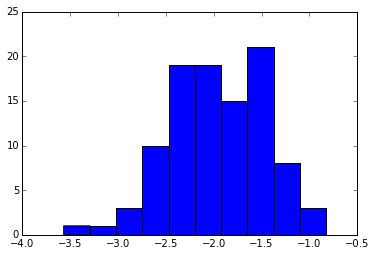

In [26]:
%matplotlib inline
plt.hist(Data)

Now assume You were given this data and an oracle told you the standard deviation was 0.5, but you wanted to find out what the distribution of the mean was. We can set up a model in PyMC3 as follows.

In [28]:
from pymc3 import Model, Normal

our_first_model = Model()

with our_first_model:

    # Prior for mean. We don't know what it is so we'll just
    #set a really high standard deviation. The data will
    #wash it out anyway
    mu = Normal('mu', mu=0, sd=10)

    # Likelihood (sampling distribution) of observations
    observations = Normal('observations', mu=mu, sd=0.5, observed=Data)

In [29]:
from pymc3 import NUTS, sample

with our_first_model:

    # instantiate sampler
    step = NUTS()

    # draw 2000 posterior samples
    trace = sample(2000, step)

 [-----------------100%-----------------] 2000 of 2000 complete in 0.4 sec

/Users/Arya/anaconda/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


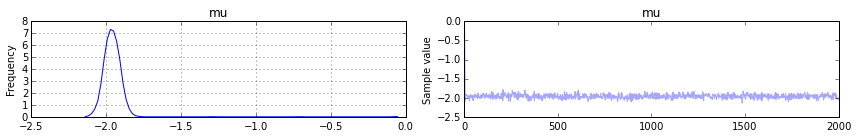

In [33]:
from pymc3 import traceplot

traceplot(trace);